OOB Accuracy: 91.67%
Test Set Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


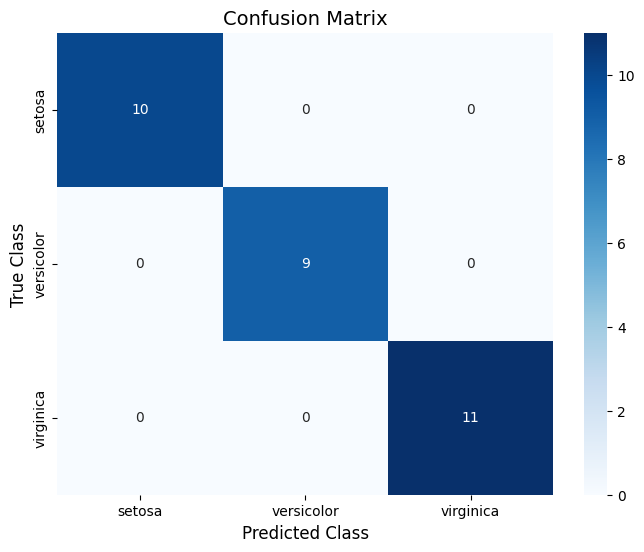

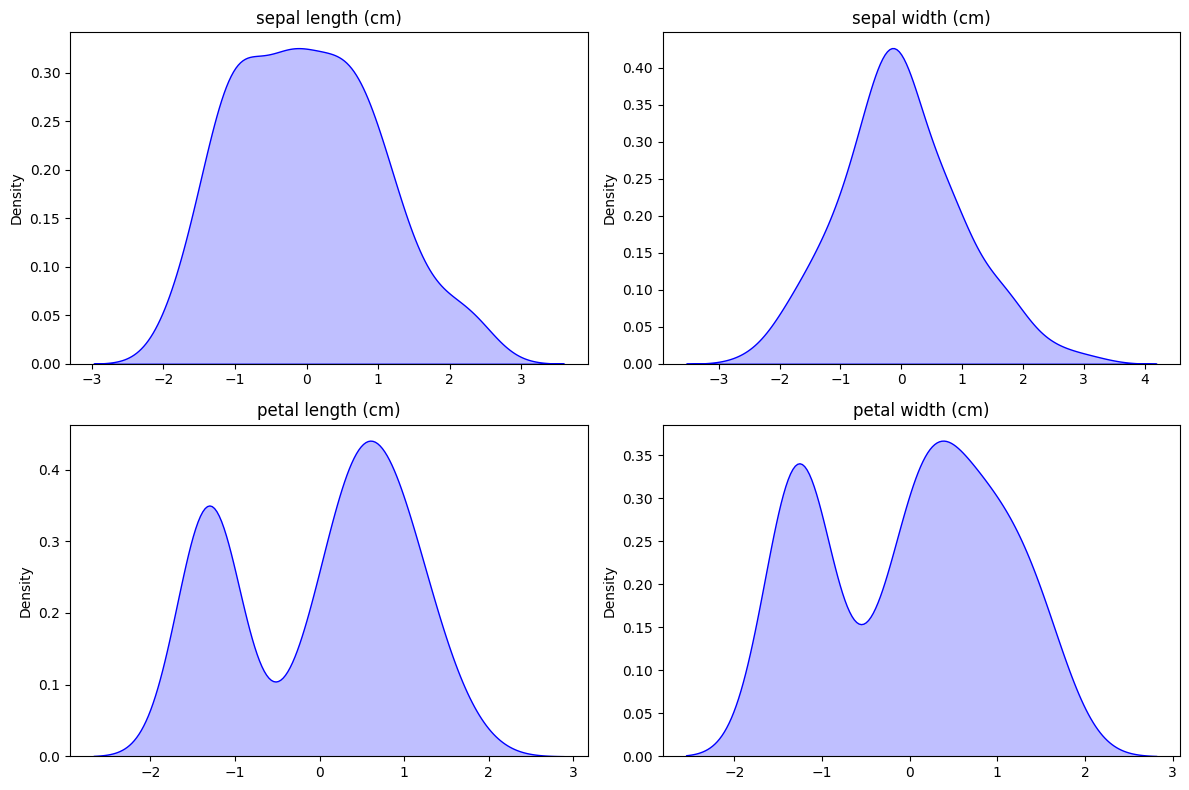

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Labels (target variable)

# Data Preprocessing: Feature scaling (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model with OOB scoring enabled
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, oob_score=True)
rf_model.fit(X_train, y_train)

# OOB Score
print(f"OOB Accuracy: {rf_model.oob_score_ * 100:.2f}%")

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

# Visualize Feature Distributions
features = data.feature_names
plt.figure(figsize=(12, 8))
for i in range(len(features)):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(X_scaled[:, i], fill=True, color="blue")
    plt.title(features[i])
plt.tight_layout()
plt.show()


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best parameters found by GridSearchCV: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Test Set Accuracy: 100.00%


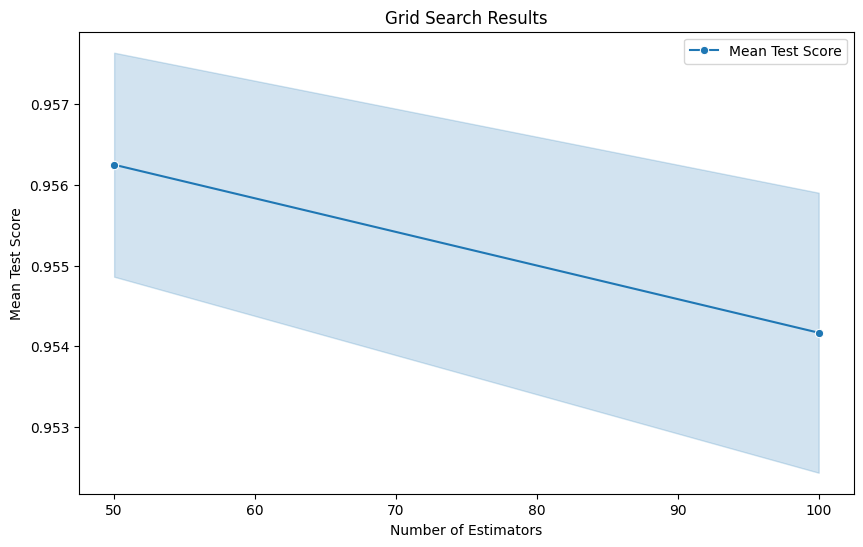

In [3]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross-validation
                           verbose=2,
                           n_jobs=-1)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and model
print(f"\nBest parameters found by GridSearchCV: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rf_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"\nBest Test Set Accuracy: {best_accuracy * 100:.2f}%")

# Visualizing Grid Search Results
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
sns.lineplot(data=cv_results, x='param_n_estimators', y='mean_test_score', label='Mean Test Score', marker="o")
plt.title("Grid Search Results")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test Score")
plt.legend()
plt.show()


Fitting 3 folds for each of 5 candidates, totalling 15 fits

Best parameters found by RandomizedSearchCV: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}

Random Search Test Set Accuracy: 100.00%


<ipython-input-4-3d5508c5485e>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


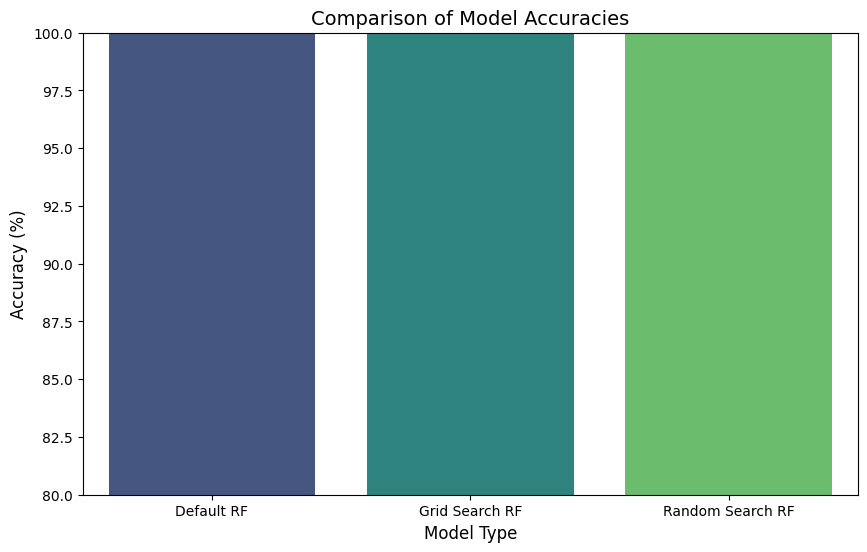

In [4]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=5,  # Limited iterations for faster search
                                   cv=3,  # 3-fold cross-validation
                                   verbose=2,
                                   n_jobs=-1)

# Train the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and model
print(f"\nBest parameters found by RandomizedSearchCV: {random_search.best_params_}")
best_rf_random_model = random_search.best_estimator_

# Evaluate the best random search model
y_pred_random_best = best_rf_random_model.predict(X_test)
random_best_accuracy = accuracy_score(y_test, y_pred_random_best)
print(f"\nRandom Search Test Set Accuracy: {random_best_accuracy * 100:.2f}%")

# Compare the models
models = ['Default RF', 'Grid Search RF', 'Random Search RF']
accuracies = [test_accuracy * 100, best_accuracy * 100, random_best_accuracy * 100]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Comparison of Model Accuracies", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xlabel("Model Type", fontsize=12)
plt.ylim(80, 100)
plt.show()
